In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
%matplotlib inline

In [96]:
df = pd.read_csv("C:\\Users\\ASUS\\Documents\\Data Analysis\\BangaloreZomato.csv")

In [97]:
df.head()

,S.No.,Name,Address,Phone,Location,Rating,Review
0,1,Aubree,307 Govinda Chetty Colony Thimmaiah Road Shiva...,9.190000e+11,shivajinagar,2.5,20
1,2,Uttam Sagar,80 Feet Road Cross Near Banaswadi Main Road Ba...,9.180000e+11,banaswadi,2.6,115
2,3,Gopaljee Cafe,226 Someshawara Temple Road Koramangala 7th Bl...,9.190000e+11,koramangala,3.8,69
3,4,Third Wave Coffee,13 Old 4/1 Ground Floor Near Walton Road Lavel...,9.200000e+11,lavelleroad,3.9,144
4,5,ibaco,121 Civil Station Wood Street Junction Brigade...,9.180000e+11,brigade road,3.8,107


In [98]:
# Now we need to remove duplicates :
df.drop_duplicates(inplace = True)
df.shape

(119, 7)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No.     119 non-null    int64  
 1   Name      119 non-null    object 
 2   Address   119 non-null    object 
 3   Phone     119 non-null    float64
 4   Location  119 non-null    object 
 5   Rating    84 non-null     float64
 6   Review    119 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 7.4+ KB


In [100]:
df = df.drop(['S.No.','Phone','Address'],axis=1)

In [101]:
# as we can see, we got rid of duplicates and not so important features :
df.head()

,Name,Location,Rating,Review
0,Aubree,shivajinagar,2.5,20
1,Uttam Sagar,banaswadi,2.6,115
2,Gopaljee Cafe,koramangala,3.8,69
3,Third Wave Coffee,lavelleroad,3.9,144
4,ibaco,brigade road,3.8,107


In [102]:
# Now we need to rename the column names as given below :
df.rename(columns={'Name': 'RestaurentNames'}, inplace =True)

In [103]:
df.head()

,RestaurentNames,Location,Rating,Review
0,Aubree,shivajinagar,2.5,20
1,Uttam Sagar,banaswadi,2.6,115
2,Gopaljee Cafe,koramangala,3.8,69
3,Third Wave Coffee,lavelleroad,3.9,144
4,ibaco,brigade road,3.8,107


In [104]:
# Analyse each columns :
df.Rating.unique()
# Here we found that there are na values under the rating column which needs to be treated.

array([2.5, 2.6, 3.8, 3.9, 3.2, 4.3, 3.6, 4.1, 4.2, 3. , nan, 4. , 4.4,
       2.9, 3.5, 3.1, 3.7, 3.3, 2.7, 4.9, 3.4, 2.8, 4.6])

In [105]:
# As we can see that there are some Nan missing values, therefore we need to treat these missing values first :
# As we can see that Rating is a float character, hence, we need to replace the na values with 0 :
df['Rating'].fillna('0', inplace = True)

In [106]:
# As we converted the na values with 0 since it was a numerical variable, therefore, as we can see that it returned the column as an object.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RestaurentNames  119 non-null    object
 1   Location         119 non-null    object
 2   Rating           119 non-null    object
 3   Review           119 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.6+ KB


In [107]:
# Rating varaible needs to be converted into a floating varaible so that we can proceed further with the analysis :
df['Rating']= df.Rating.astype(float)

In [108]:
df.info() # We converted the Rating column into floating variable from an object.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RestaurentNames  119 non-null    object 
 1   Location         119 non-null    object 
 2   Rating           119 non-null    float64
 3   Review           119 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


In [109]:
# Analyse Review Column :
df.Review.unique()
# As we can see that there are no missing na values under the review column so we can proceed further.

array([  20,  115,   69,  144,  107,  214,   51,   28, 1503,   25,  202,
         42,  266,   31,  242,    0,  215,  958,    3,  147,   49,   24,
         16,  569,  225,  523,   64,   62,  745,  471,   23,  301,   80,
         75,   35,  241,  201,  344,   33,   43,   83,  395,   85,  152,
         77,    5,  171,   68,   17,    4,  578, 1069, 1132,   22,   12,
       2274,    6,   56,    2,  901,  417,   19,   13,  754,  650,   71,
        111,  699, 8060,  275,  377,   11,   34,   29,  918,    1],
      dtype=int64)

In [110]:
# Analyse Location column :
df.Location.unique()

array(['shivajinagar', 'banaswadi', 'koramangala', 'lavelleroad',
       'brigade road', 'basavanagudi', 'rajajinagar', 'ulsoorbangalore',
       'St Marks Road bangalore', 'infantryroad',
       'Chickpet City bangalore', 'residencyroadbangalore',
       'pulavcitymarketbangalore', 'mgroadbangalore',
       'koramangala5thblock', 'magadiroadbangalore',
       'stmarksroadbangalore', 'majesticbangalore', 'shantinagar',
       'residencyroad', 'indiranagar', 'domlur', 'mgroad',
       'koramangala6thblock', 'commercialstreet', 'jayanagar',
       'cunninghamroad', 'vasanthnagar', 'seshadripuram', 'richmondroad',
       'malleshwaram', 'mysoreroad', 'langfordtown', 'kalyannagar', 'hsr',
       'koramangala7thblock', 'btm', 'koramangala8thblock', 'frazertown',
       'koramangala4thblock', 'majestic', 'viharcitymarket', 'rtnagar',
       'nagarbhavi', 'grand', 'aditya', 'krisnavaibhava',
       'koramangala1stblock', 'uttarahalli', 'ulsoor', 'sarjapurroad',
       'shantinagarbangalore'],

In [111]:
# As we can see there are a number of places from where customers place orders, therefore, 
# we need to segregate the location data ocurring in maximum number to minimum number.
df.Location.value_counts()

basavanagudi                14
indiranagar                  7
malleshwaram                 5
majestic                     4
rajajinagar                  4
cunninghamroad               4
koramangala5thblock          4
btm                          4
shivajinagar                 4
brigade road                 4
lavelleroad                  3
vasanthnagar                 3
mgroad                       3
koramangala4thblock          3
domlur                       3
residencyroad                3
jayanagar                    3
infantryroad                 2
seshadripuram                2
koramangala6thblock          2
frazertown                   2
shantinagar                  2
kalyannagar                  2
koramangala                  2
koramangala7thblock          2
richmondroad                 2
langfordtown                 1
Chickpet City bangalore      1
hsr                          1
viharcitymarket              1
shantinagarbangalore         1
magadiroadbangalore          1
mgroadba

In [112]:
Location = df.Location.value_counts()
Location_less_than_3=Location[Location<3]
Location_less_than_3 
# Location with lowest occurring values, i.e., customers were found to be ordering less from these particular locations.
# These are some of the restaurents we need to focus on more and help them to encourage customers to order more on a single day.

infantryroad                2
seshadripuram               2
koramangala6thblock         2
frazertown                  2
shantinagar                 2
kalyannagar                 2
koramangala                 2
koramangala7thblock         2
richmondroad                2
langfordtown                1
Chickpet City bangalore     1
hsr                         1
viharcitymarket             1
shantinagarbangalore        1
magadiroadbangalore         1
mgroadbangalore             1
sarjapurroad                1
residencyroadbangalore      1
ulsoorbangalore             1
uttarahalli                 1
mysoreroad                  1
banaswadi                   1
nagarbhavi                  1
stmarksroadbangalore        1
krisnavaibhava              1
koramangala1stblock         1
koramangala8thblock         1
pulavcitymarketbangalore    1
aditya                      1
St Marks Road bangalore     1
grand                       1
ulsoor                      1
commercialstreet            1
rtnagar   

In [113]:
# We need to classify the locations with lower order count as others and high order count with the values as given below:
def handle_Location(value):
    if (value in Location_less_than_3):
        return 'others'
    else:
        return value
df.Location = df.Location.apply(handle_Location)
df.Location.value_counts()

others                 44
basavanagudi           14
indiranagar             7
malleshwaram            5
btm                     4
cunninghamroad          4
koramangala5thblock     4
brigade road            4
rajajinagar             4
shivajinagar            4
majestic                4
lavelleroad             3
mgroad                  3
koramangala4thblock     3
vasanthnagar            3
domlur                  3
jayanagar               3
residencyroad           3
Name: Location, dtype: int64

In [114]:
# Now we have to convert the Location into floating variables to proceed further with our analysis :
def Location(x):
    if x == 'shivajinagar':
        return 1
    if x == 'lavelleroad':
        return 2
    if x == 'brigade road':
        return 3
    if x == 'basavanagudi':
        return 4
    if x == 'rajajinagar':
        return 5
    if x == 'koramangala5thblock':
        return 6
    if x == 'residencyroad':
        return 7
    if x == 'indiranagar':
        return 8
    if x == 'domlur':
        return 9
    if x == 'mgroad':
        return 10
    if x == 'jayanagar':
        return 11
    if x == 'cunninghamroad':
        return 12
    if x == 'vasanthnagar':
        return 13
    if x == 'malleshwaram':
        return 14
    if x == 'btm':
        return 15
    if x == 'koramangala4thblock':
        return 16
    if x == 'majestic':
        return 17
    if x == 'others':
        return 18
    
df['Location'] = df['Location'].apply(Location)
df.Location.unique()

array([ 1, 18,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)

In [115]:
# In order to treat the na values under Location tab, 
# we need to replace the na values with mode (most occurring value, i.e.,18 for others) as we are dealing with categorical variable.
df['Location'].fillna('18', inplace = True)

In [116]:
df.info() # As we can see Location was still an object, therefore, we need to convert the location to floating/numerical variable.
# As we have treated the na values under Location, we now have to convert the attributes to floating variables :
df['Location']= df.Location.astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RestaurentNames  119 non-null    object 
 1   Location         119 non-null    int64  
 2   Rating           119 non-null    float64
 3   Review           119 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.6+ KB


In [117]:
# Now we will do the same segregation with the Restaurent Names column as well :
df.RestaurentNames.value_counts()

The Hole In The Wall Cafe    3
Sri Udupi Grand              2
Shyamji's Chole Bhature      2
Theobroma                    1
Shrinidhi Military Hotel     1
                            ..
Royal Restaurant             1
Chaayos Chai+Snacks=Relax    1
Green Cravings               1
Ramji Chaiwale               1
SLV Corner Restaurant        1
Name: RestaurentNames, Length: 115, dtype: int64

In [118]:
RestaurentNames = df.RestaurentNames.value_counts()
RestaurentNames_less_than_2 = RestaurentNames[RestaurentNames<2]
RestaurentNames_less_than_2

Theobroma                      1
Shrinidhi Military Hotel       1
Asha Sweet Center              1
Priyadarshini Restaurant       1
Sri Bettaiah Military Hotel    1
                              ..
Royal Restaurant               1
Chaayos Chai+Snacks=Relax      1
Green Cravings                 1
Ramji Chaiwale                 1
SLV Corner Restaurant          1
Name: RestaurentNames, Length: 112, dtype: int64

In [119]:
def handle_RestaurentNames(value):
    if (value in RestaurentNames_less_than_2):
        return 'others'
    else:
        return value
df.RestaurentNames = df.RestaurentNames.apply(handle_RestaurentNames)
df.RestaurentNames.unique()

array(['others', 'Sri Udupi Grand', 'The Hole In The Wall Cafe',
       "Shyamji's Chole Bhature"], dtype=object)

In [120]:
# Now we need to convert the restaurent names into numerical characters to proceed in order to do the classification for each segments :
def RestaurentNames(x):
    if x == "Sri Udupi Grand":
        return 1
    if x == "The Hole In The Wall Cafe":
        return 2
    if x == "Shyamji's Chole Bhature":
        return 3
    if x == "others":
        return 4
df['RestaurentNames'] = df['RestaurentNames'].apply(RestaurentNames)
df.RestaurentNames.unique()

array([4, 1, 2, 3], dtype=int64)

In [121]:
# Now we need to convert the column Restaurent Names to floating variable :
df['RestaurentNames']= df.RestaurentNames.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RestaurentNames  119 non-null    float64
 1   Location         119 non-null    float64
 2   Rating           119 non-null    float64
 3   Review           119 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.6 KB


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


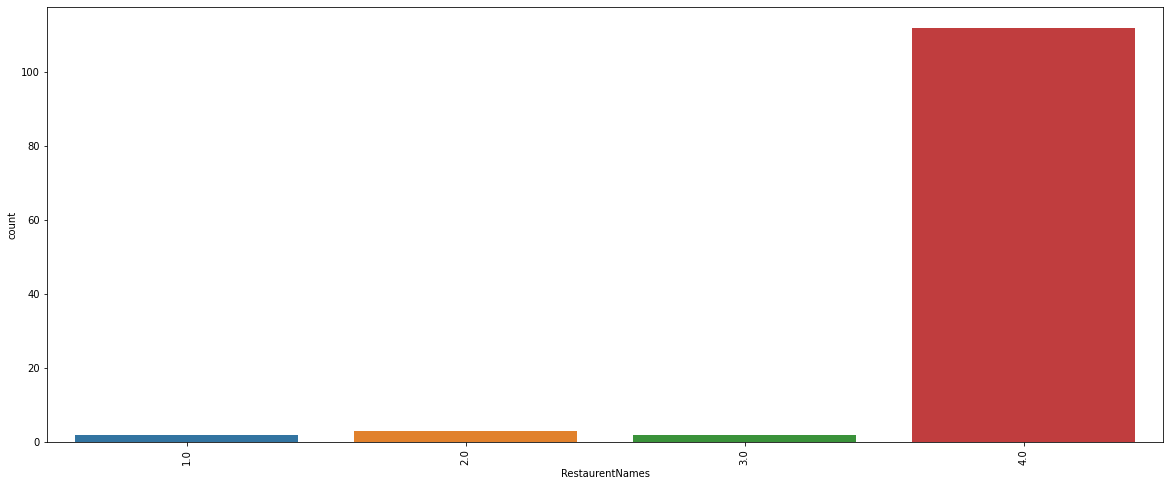

In [122]:
# Now that we have cleaned up our data, we will do data visualization :
plt.figure(figsize=(20,8))
ax = sns.countplot(df['RestaurentNames'])
plt.xticks(rotation=90)
plt.show()
# the given below graph shows that the locations under other category has huge opportunity to better their service delivery.
# they can come up with combo options at reasonable prize offerings, so they can know what the customers like and how they can enhance the taste or introduce other varieties as per the customers preference.
# We also need to find out which type of customers stay at these places with order count 1 per day :
# which includes sarjapurroad               
# rtnagar,ulsoor,nagarbhavi,langfordtown,stmarksroadbangalore,krisnavaibhavagrand,mgroadbangalore,mysoreroad,Chickpet City bangalore     
# commercialstreet,shantinagarbangalore,residencyroadbangalore,viharcitymarket,adityamajesticbangalore,magadiroadbangalore         
# koramangala1stblock,pulavcitymarketbangalore,uttarahalli,hsr,banaswadi,koramangala8thblock, so that we can introduce the kind of flavours food items of their choices.
# Order Count -2 : infantryroad,seshadripuram,koramangala6thblock,frazertown,shantinagar,kalyannagar,koramangala,koramangala7thblock,richmondroad these restaurents were found to be ordering twice on a single day,
# Hence we need to check what is the main food items they are ordering, and what similar dishes can be introduced at a reasonable prize along with the menu items to encourage them to order more.
# Theobroma,Shrinidhi Military Hotel,Asha Sweet Center,Priyadarshini Restaurant,Sri Bettaiah Military Hotel,Royal Restaurant               1
# Chaayos Chai+Snacks=Relax,Green Cravings,Ramji Chaiwale,SLV Corner Restaurant, etc were those restaurents from where customers were ordering only for once.


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


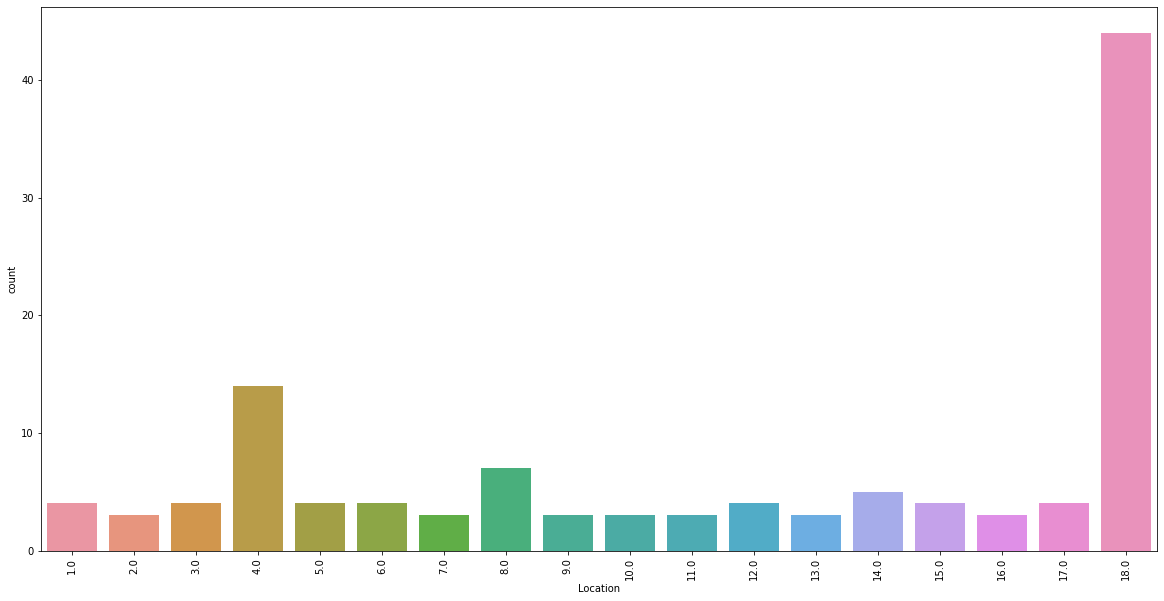

In [123]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df.Location)
plt.xticks(rotation=90)
plt.show() 
# Here we can see that the maximum number of orders are getting generated from other restaurents which hardly appear once in a single day,
# which includes sarjapurroad               
# rtnagar,ulsoor,nagarbhavi,langfordtown,stmarksroadbangalore,krisnavaibhavagrand,mysoreroad,Chickpet City bangalore     
# commercialstreet,shantinagarbangalore,residencyroadbangalore,viharcitymarket,adityamajesticbangalore,magadiroadbangalore         
# koramangala1stblock,pulavcitymarketbangalore,uttarahalli,hsr,banaswadi,koramangala8thblock, etc.
# The maximum orders gets generated from basavanagudi, followed by Indiranagar, malleshwaram, majestic, cunninghamroad, koramangala5th block, brigade road, rajajinagar, shivajinagar, 
# and the average number of orders (3) were found to be lavelleroad,mgroad,koramangala4thblock,vasanthnagar,domlur,jayanagar,residencyroad, etc.

# Now that our data is all cleaned up, we will do some "Data Visualization" to answer some questions given below :
# 1.) Which locations generate maximum orders?
# 2.) Which locations generate highest number of reviews?
# 3.) Identify the location with highest number of reviews?
# 5.) Which location have poor ratings?
# 6.) Which restaurent have poor ratings?

<AxesSubplot:xlabel='Location', ylabel='Rating'>

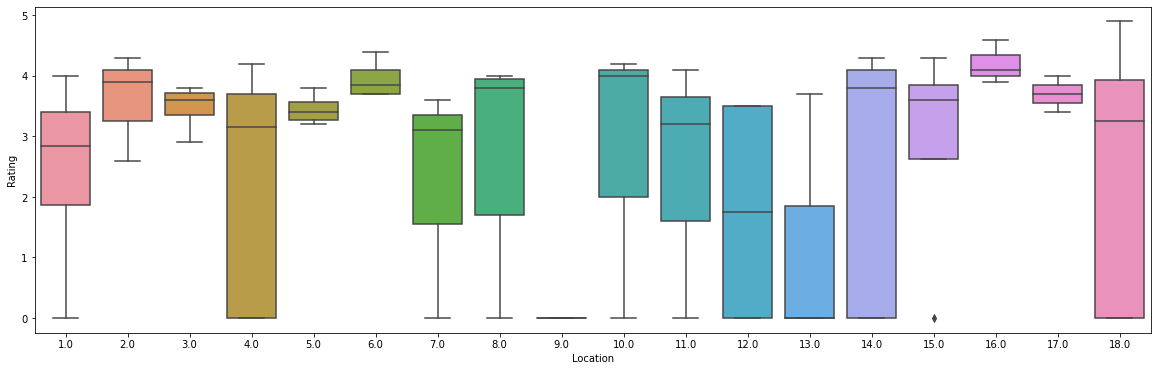

In [124]:
# Now we will try to find out which location give highest rating :
plt.figure(figsize=(20,6))
sns.boxplot(x= 'Location', y='Rating', data=df)
# As we can see that the highest no of ratings are coming from koramangala 4th block(3), koramangala 5th block(4), mgroad(4), lavelleroad(3),respectively. These locations are ordering more and giving the highest ratings also possible, this shows us that teh service delivery is quite good and therefore the sales is also high. 
# and the low ratings are coming from basavanagudi,others,malleshwaram, cunningham road, etc. These areas order more however they were found giving average ratings, ranging from 0 to 3.4,0 to 4, 0 to 3.5 respectively.
# Rest all other locations are giving average ratings may be ordering once or twice but giving average ratings.
# Location number 9 (Domlur) didnt give any ratings as shown below,indiranagar and mg raod was more concentrated giving ratings in between 2 and 4 or more than 4,
# Shivajinagar (2 to 3.5), brigade road ordering less however were found giving decent ratings, 3.7, rajajinagar (3.5),koramangala5th block (4.5),
# residencyroad (1.8 to 3.4), jayanagar(1.8 to 3.7), cunninghamroad (0 to 3.5), vasanthnagar(0 to 1.8), malleshwaram(0 to 4),
# btm(2.5 to 3.5), koramangala4th block(4 to 4.5), majestic(3.5 to 4),others ordering only once a day (concentrated between 0 to 4) 

<AxesSubplot:xlabel='RestaurentNames', ylabel='Rating'>

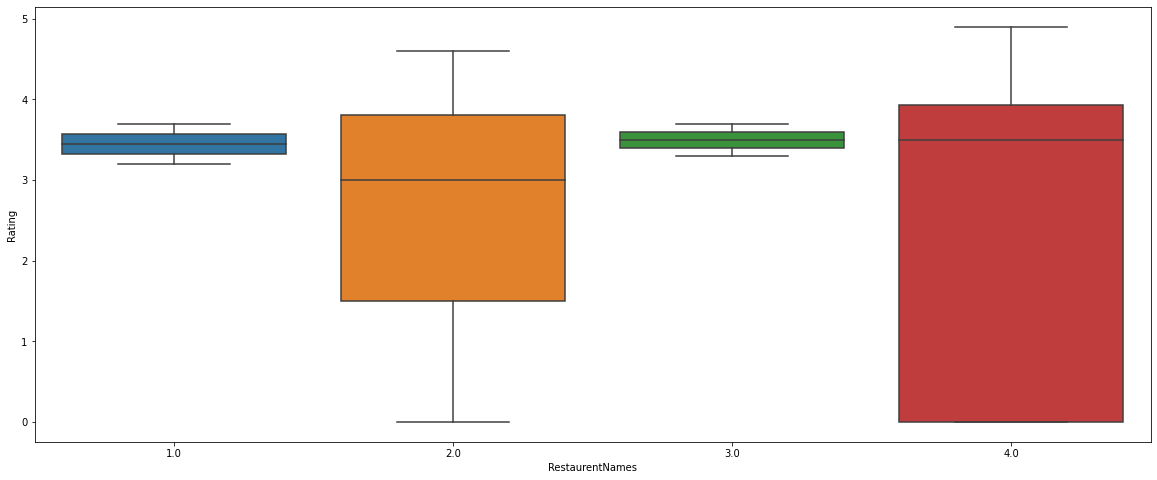

In [125]:
# Now we will try to find out which restaurent names gives highest and poor ratings as below :
plt.figure(figsize=(20,8))
sns.boxplot(x='RestaurentNames',y ='Rating', data=df)
# We can see that Sri Udupi Grand and Shamyji's Chole Bhature were found giving highest ratings.
# On the other hand, the customers ordering from the hole in the wall cafe are giving average ratings, ranging from 2 to 4. 
# and the customers under others or the ones who are ordering only once or may be they are the first timers were found to be comparitively higher ratings (0 to 3.9/4.0).

<AxesSubplot:xlabel='RestaurentNames', ylabel='Review'>

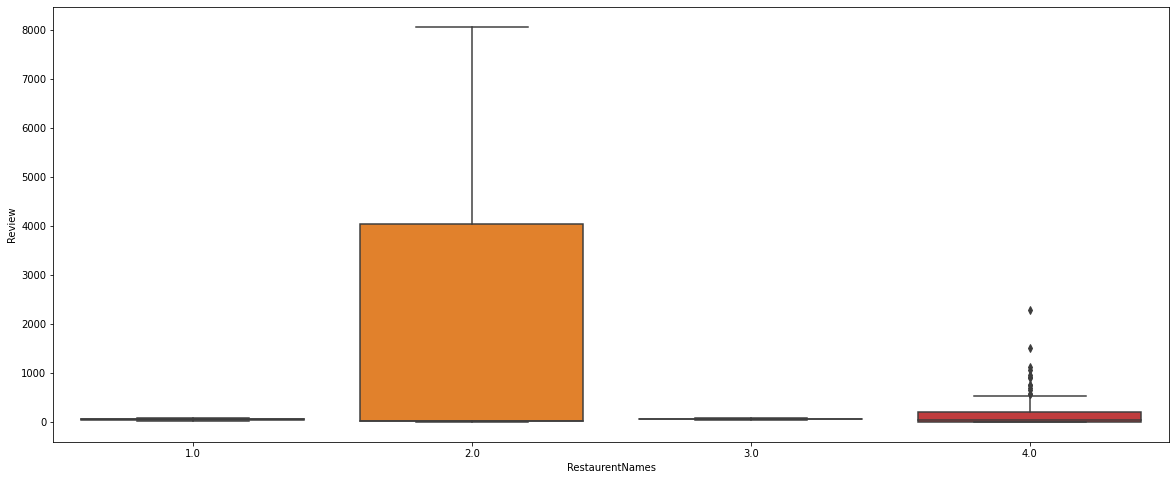

In [126]:
# We will try to find which location or restaurent gives highest reviews :
plt.figure(figsize=(20,8))
sns.boxplot(x = 'RestaurentNames', y = 'Review', data=df)
# Here we can see that the restaurentname "The Hole in the wall cafe" are giving more reviews but less rating, 
# Also there are significant opportunities found under the other (who are also the first timers) providing less reviews and low ratings as well.
# So our opportunity statement lies with providing more options to the ones staing in the other location categories 
# by providing discounts along with other combo packages which will allow them to taste more and provide their valuable inputs so that the taste can be enhanced or they can work on improving their service delivery. 

<AxesSubplot:xlabel='Location', ylabel='Review'>

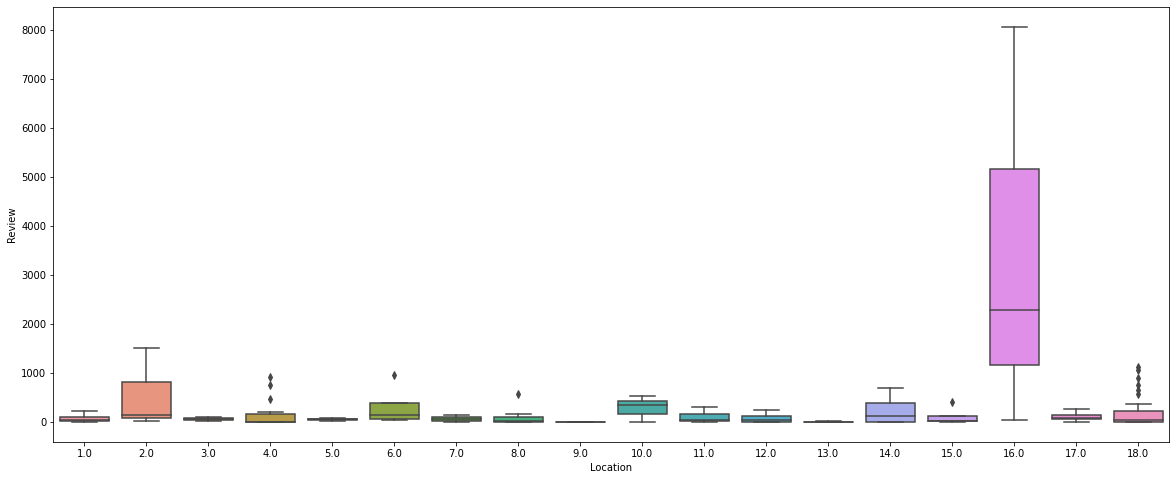

In [127]:
# Now we will try to take a quick look on which restaurent provides highest rating :
plt.figure(figsize=(20,8))
sns.boxplot(x='Location', y='Review', data=df) 
# Location wise Koramangala 4th block gives the highest reviews which shows that the food and service delivered was far more better as compared to the other places.
# We can see that the customers under other locations(18), malleshwaram,lavelleroad, mgroad were giving comparitively average reviews.
# This shows that there is more opportunity in understanding the reason why the reviews are low and what can be done to improve the reviews in these locations.


In [128]:
# Now we want to find out avaerge rating based on location, 
# then we will group the columns by using groupby function as given below :
df1 = df.groupby(['Location', 'Rating'])['RestaurentNames'].count()
df1.to_csv('Location_Rating.csv')
df1=pd.read_csv('Location_Rating.csv')
df1= pd.pivot_table(df1, values=None, index='Location',columns='Rating', fill_value=0, aggfunc=np.sum)
df1
# As we can see below that locations under others are more concentrated on giving 0 ratings which includes places like sarjapurroad               
# rtnagar,ulsoor,nagarbhavi,langfordtown,stmarksroadbangalore,krisnavaibhavagrand,mgroadbangalore,mysoreroad,Chickpet City bangalore     
# commercialstreet,shantinagarbangalore,residencyroadbangalore,viharcitymarket,adityamajesticbangalore,magadiroadbangalore         
# koramangala1stblock,pulavcitymarketbangalore,uttarahalli,hsr,banaswadi,koramangala8thblock, etc have huge opportunity in enhancing the taste of the food or provide more options to the customers by providing combo packs at reasonable prize. 
# Basavangudi,residencyroad, indiranagar,Domlur were some places giving the worst ratings 0 and has opportunities to provide discounts, or combo packs to
# attract customers to taste more food and provide us with good ratings, these restaurents also needs to do better their service delivery and also work on enhancing the taste of the food as well.
# Restaurents such as Gopaljee Cafe,CakeZone,Ammas Cakes,Priyadarshini Restaurant,Third Wave Coffee,Banoffee,Vishnu Garden,Sikori                      
# Green Cravings,The Baker's Dozen should work on providing the best quality food and service in order to get good ratings.

RestaurentNames                                      ...              \
Rating               0.0 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3  ... 3.7 3.8 3.9   
Location                                                      ...               
1.0                    1   1   0   0   0   0   0   0   1   0  ...   0   0   0   
2.0                    0   0   1   0   0   0   0   0   0   0  ...   0   0   1   
3.0                    0   0   0   0   0   1   0   0   0   0  ...   1   1   0   
4.0                    5   0   0   1   0   0   0   1   1   1  ...   0   1   0   
5.0                    0   0   0   0   0   0   0   0   1   1  ...   0   1   0   
6.0                    0   0   0   0   0   0   0   0   0   0  ...   2   0   0   
7.0                    1   0   0   0   0   0   0   1   0   0  ...   0   0   0   
8.0                    2   0   0   0   0   0   0   0   0   0  ...   0   1   1   
9.0                    3   0   0   0   0   0   0   0   0   0  ...   0   0   0   
10.0                   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   
11.0                   1   0   0   0   0   0   0   0   1   0  ...   0   0   0   
12.0                   2   0   0   0   0   0   0   0   0   0  ...   0   0   0   
13.0                   2   0   0   0   0   0   0   0   0   0  ...   1   0   0   
14.0                   2   0   0   0   0   0   0   0   0   0  ...   0   1   0   
15.0                   1   0   0   0   0   0   0   0   0   0  ...   1   0   0   
16.0                   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   
17.0                   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   
18.0                  14   0   1   0   1   0   2   1   3   1  ...   2   4   1   

                                      
Rating   4.0 4.1 4.2 4.3 4.4 4.6 4.9  
Location                              
1.0        1   0   0   0   0   0   0  
2.0        0   0   0   1   0   0   0  
3.0        0   0   0   0   0   0   0  
4.0        1   1   1   0   0   0   0  
5.0        0   0   0   0   0   0   0  
6.0        1   0   0   0   1   0   0  
7.0        0   0   0   0   0   0   0  
8.0        2   0   0   0   0   0   0  
9.0        0   0   0   0   0   0   0  
10.0       1   0   1   0   0   0   0  
11.0       0   1   0   0   0   0   0  
12.0       0   0   0   0   0   0   0  
13.0       0   0   0   0   0   0   0  
14.0       0   1   0   1   0   0   0  
15.0       0   0   0   1   0   0   0  
16.0       0   1   0   0   0   1   0  
17.0       1   0   0   0   0   0   0  
18.0       1   5   3   0   1   0   1  

[18 rows x 23 columns]